# Imports

In [1]:
import csv
import pandas as pd
from utils.csv_headers import *
import seaborn as sns

# High-level exploration

In [2]:
# count number of successful gender assignment

with open('content/enhanced-output.csv', 'r', encoding='utf-8') as csv_file_descriptor:
    dataset = csv.DictReader(csv_file_descriptor, delimiter=',', quotechar='"')
    
    count_f = 0
    count_m = 0
    count_null = 0

    for row in dataset:
        if row[CONTACT_PI_GENDER] == 'F':
            count_f += 1
        elif row[CONTACT_PI_GENDER] == 'M':
            count_m += 1
        else:
            count_null += 1

    print("count_f: ", count_f)
    print("count_m: ", count_m)
    print("count_null: ", count_null)
    print("sum: ", count_f + count_m + count_null)

count_f:  603453
count_m:  1627218
count_null:  308878
sum:  2539549


| gender    	| nb of rows   	|% of rows   	|
|:-------------	|-----------:	|-----------:	|
| count_f:    	| 603 453   	|23,76 %   	   	|
| count_m:    	| 1 627 218   	|64,08 %   	   	|
| count_null: 	| 308 878   	|12,16 %   	   	|
| sum w/ null:  | 2 539 549 	|100,00 % 	   	|


| gender    	| nb of rows   	|% of rows   	|
|:-------------	|-----------:	|-----------:	|
| count_f:    	| 603 453   	|27,05 %   	   	|
| count_m:    	| 1 627 218   	|72,95 %   	   	|
| sum w/o null: | 2 230 671 	|100,00 % 	   	|


Those preliminary matching results are consistent with literature on the composition of the scientific workforce:

> "At the global level, women account for less than a third of scientists and engineers (1); a percentage that is similar to their proportion of scientific authorships (2). In the United States, women represent 28.4% of the scientific workforce, and this percentage varies by domain, with a high of 72.8% in psychology and a low of 14.5% in engineering (3)." https://doi.org/10.1073/pnas.2113067119

The recall rate could be improved in future iterations (by combining with another dataset or by manually assigning gender). 

# Exploring the cleaned subset

In [3]:
dataset = pd.read_csv('content/cleaned_subset.csv')
dataset.head()

,APPLICATION_ID,CONTACT_PI_NAME,CONTACT_PI_GENDER,NB_PI_NAMES,ORG_COUNTRY,ORG_STATE,ORG_NAME,PROJECT_START,PROJECT_END,PROJECT_TITLE,PROJECT_TERMS,TOTAL_COST
0,10152786,"OLDENBURG, AMY L (contact)",F,2,UNITED STATES,NC,UNIV OF NORTH CAROLINA CHAPEL HILL,09/28/2020,06/30/2025,Developing an in vitro to in vivo pipeline of ...,3-Dimensional; Acids; Affect; Animals; Archite...,559511
1,10052974,"VARAS-DIAZ, NELSON (contact)",M,3,UNITED STATES,FL,FLORIDA INTERNATIONAL UNIVERSITY,07/29/2020,02/29/2024,Physician Migration and its Implications for P...,Address; Affect; Appointment; Area; base; care...,664019
2,9914554,"DEROSA, EVE (contact)",F,2,UNITED STATES,NY,CORNELL UNIVERSITY,05/15/2020,02/28/2025,Basal Forebrain connections to the heart and m...,Acetylcholine; age related; Aging; Alzheimer's...,612832
3,10053211,"FAN, ZHAOYANG (contact)",M,2,UNITED STATES,CA,CEDARS-SINAI MEDICAL CENTER,07/01/2020,10/31/2020,Multi-Task MR Simulation for Abdominal Radiati...,3-Dimensional; 4D MRI; Abdomen; Adoption; Agre...,556712
4,10055540,"CHOU, DANNY HUNG-CHIEH",M,1,UNITED STATES,CA,STANFORD UNIVERSITY,07/01/2020,03/31/2024,Development of long-acting glucose-responsive ...,absorption; Acids; aggressive therapy; analog;...,643846


In [4]:
dataset.columns.values

array(['APPLICATION_ID', 'CONTACT_PI_NAME', 'CONTACT_PI_GENDER',
       'NB_PI_NAMES', 'ORG_COUNTRY', 'ORG_STATE', 'ORG_NAME',
       'PROJECT_START', 'PROJECT_END', 'PROJECT_TITLE', 'PROJECT_TERMS',
       'TOTAL_COST'], dtype=object)

In [5]:
print("Shape of our dataset: ", dataset.shape)
print('Size of our dataset: ', dataset.size)

Shape of our dataset:  (4484, 12)
Size of our dataset:  53808


In [6]:
print("Number of male/female contact PIs: ")
print(dataset.CONTACT_PI_GENDER.value_counts())

Number of male/female contact PIs: 
M    2961
F    1523
Name: CONTACT_PI_GENDER, dtype: int64


In [7]:
print("Percentage of male/female contact PIs: ")
print(dataset.CONTACT_PI_GENDER.value_counts(normalize=True))

Percentage of male/female contact PIs: 
M    0.660348
F    0.339652
Name: CONTACT_PI_GENDER, dtype: float64


In [9]:
dataset[["CONTACT_PI_GENDER", "TOTAL_COST"]].groupby("CONTACT_PI_GENDER").describe()
# 50% = median
# count = nb of non-NaN values

TOTAL_COST                                                   \
                       count           mean            std      min       25%   
CONTACT_PI_GENDER                                                               
F                     1523.0  593961.709127  795050.872628  17591.0  391367.5   
M                     2961.0  559410.701790  455375.954157   8390.0  388750.0   

                                                   
                        50%       75%         max  
CONTACT_PI_GENDER                                  
F                  519566.0  671770.5  24533829.0  
M                  497982.0  643055.0  14973241.0

In [10]:
# For projects with only 1 PI, is the funding equivalent? 
filt = dataset['NB_PI_NAMES'] == 1
dataset.loc[filt][["CONTACT_PI_GENDER", "TOTAL_COST"]].groupby("CONTACT_PI_GENDER").describe()

TOTAL_COST                                                   \
                       count           mean            std      min       25%   
CONTACT_PI_GENDER                                                               
F                     1041.0  530446.094140  492526.867811  17591.0  379219.0   
M                     2069.0  507940.823586  385916.730286   8390.0  375978.0   

                                                   
                        50%       75%         max  
CONTACT_PI_GENDER                                  
F                  475286.0  631460.0  15000000.0  
M                  454840.0  597152.0  14973241.0

In [11]:
country_grp = dataset.groupby(by=['ORG_COUNTRY', 'CONTACT_PI_GENDER'])
#country_grp.get_group('UNITED STATES')
country_grp['TOTAL_COST'].sum()

ORG_COUNTRY     CONTACT_PI_GENDER
AUSTRALIA       M                        543227
BELGIUM         M                        217174
BRAZIL          M                        454046
CANADA          F                       2154076
                M                       1269897
CHINA           M                        137000
COLOMBIA        M                        458622
DENMARK         M                        194683
FRANCE          F                        477599
ISRAEL          M                        632041
MEXICO          F                        679991
MOZAMBIQUE      M                        136452
SOUTH AFRICA    F                       3319201
                M                       1294318
SWEDEN          F                        318304
                M                        999161
UNITED KINGDOM  F                        476070
UNITED STATES   F                     897178442
                M                    1650078467
Name: TOTAL_COST, dtype: int64

# Visualization

In [12]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

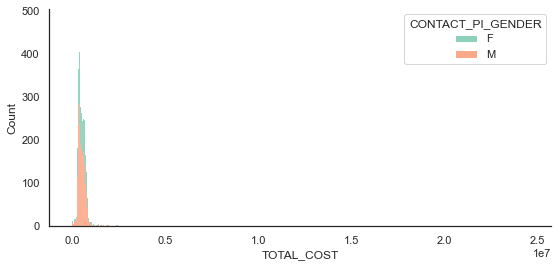

In [26]:
sns.histplot(data=dataset, x="TOTAL_COST", 
             hue="CONTACT_PI_GENDER", 
             multiple="stack")
sns.despine()

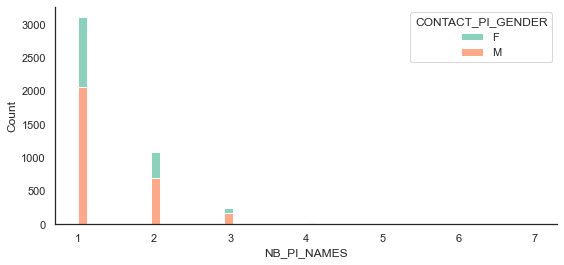

In [25]:
sns.histplot(data=dataset, x="NB_PI_NAMES", 
             hue="CONTACT_PI_GENDER", 
             multiple="stack")
sns.despine()

<AxesSubplot:xlabel='CONTACT_PI_GENDER', ylabel='count'>

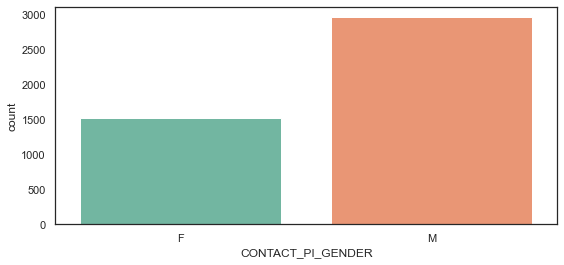

In [28]:
sns.countplot(data=dataset, x="CONTACT_PI_GENDER")